# Overview
For homework, you will take a dataset related to cardiovascular disease, analyze the dataset, and train a machine learning model to predict whether or not patients have cardiovascular disease..


In [1]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import seaborn as sns
sns.set()

# Data Analysis

### X. Read in the dataset
The dataset is included in this directory in a file called **"cardio_data.csv"**. It is tabular file separated by semicolons.

Read in the file using `pd.read_csv`. split the columns by specifying `sep=";"` . Then print out the top 5 rows.

In [2]:
df = pd.read_csv("cardio_data.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### X. Count how many patients have negative vs. positive outcomes
The outcome variable is stored in the column **"cardio"**. Negative patients are stored as **0** and positve as **1**. 

Print out how many patients are positive vs. negative. Create a bar graph showing these counts.

In [3]:
df.groupby("cardio").size()

cardio
0    35021
1    34979
dtype: int64

In [ ]:
df.groupby("cardio").size().plot.bar()

### X. Generate a histogram of all of the variables in the dataset

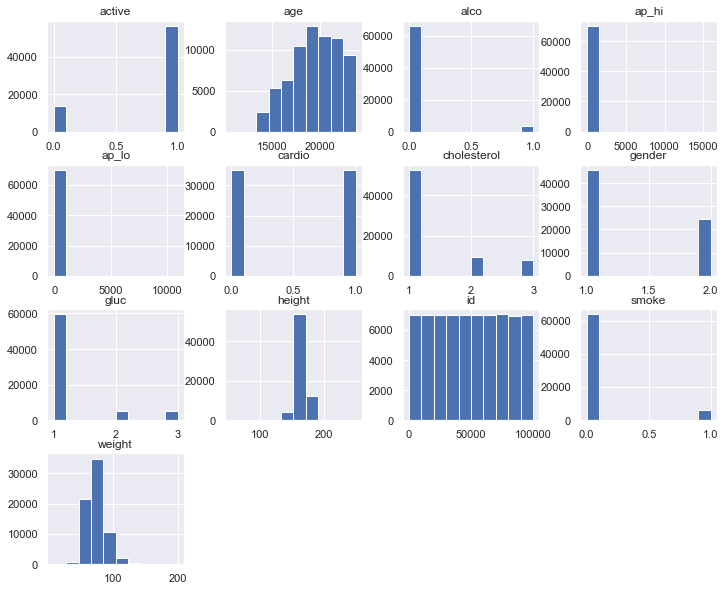

In [7]:
_ = df.hist(figsize=(12, 10))

### X. Describe the variables
Which variables are quantitative? Which are categorical?

#### Quantitative:
- age
- ap_hi/ap_lo
- height
- weight

#### Categorical:
- active
- alco
- cardio
- cholesterol
- gender
- gluc
- smoke

### X. Plot a heatmap showing a correlation matrix of the variables
Which 3 variables correlate most strongly with cardiovascular disease?
- age 
- weight
- cholesterol

In [9]:
from matplotlib import rcParams

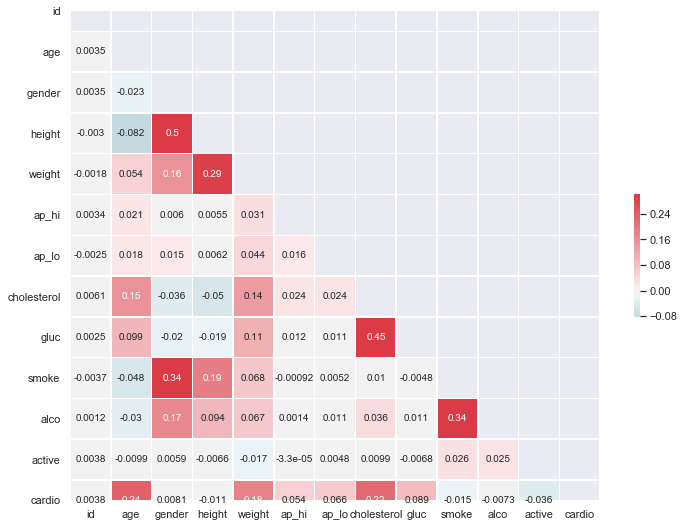

In [13]:
# Set up the matplotlib figure size
fig, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .25})

### X. Choose at least one variable correlated with cardio and analyze it

In [22]:
pos = df[df["cardio"] == 1]
neg = df[df["cardio"] == 0]

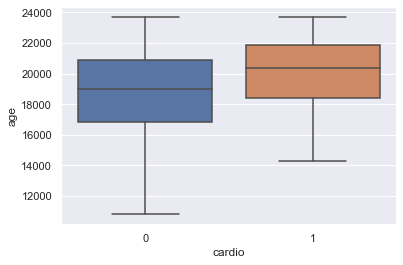

In [20]:
sns.boxplot(x="cardio", y="age", data=df)

Text(0.5, 1.0, 'Distribution of age stratified by cardio')

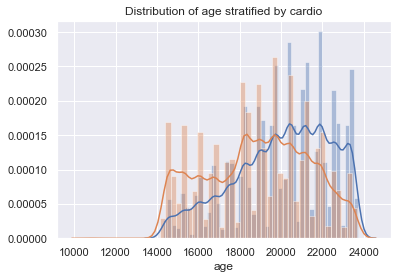

In [25]:
ax = sns.distplot(pos["age"])
sns.distplot(neg["age"], ax=ax, color="C1")
plt.title("Distribution of age stratified by cardio")

# Data Prep

There are no missing values in this dataset, so we'll skip that step.

### Split your dataset into `X` and `y`
Remember, `X` should contain all the **features** of the dataset, `y` should contain the `label`.

**Question:** Are their any rows which shouldn't be included in either `X` or `y`? Make sure that you drop these columns.

In [29]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [31]:
X = df.drop(["id", "cardio"], axis=1)
y = df["cardio"]

### Split `X` and `y` into training and testing sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Modeling and Evaluation

### X. Choose at least 3 different ML algorithms. Import them from scikit-learn and instantiate them.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [41]:
models = {
    "RFC": RandomForestClassifier(),
    "LR": LogisticRegression(),
    "NB": GaussianNB()
}

### X. For each of your models, fit them to your dataset and evaluate the accuracy

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
model_scores = []
model_names_scores = []

for name, model in models.items():
    # Train the model
    print("Training {}".format(name))
    model.fit(X_train, y_train)
    
    # Predict on the test set
    pred = model.predict(X_test)
    # Measure the accuracy
    accuracy  = accuracy_score(y_test, pred)
    print("Accuracy: {}".format(accuracy))
    print()
    
    # Append to this list to analyze later
    model_names_scores.append((name, accuracy))

Training RFC
Accuracy: 0.6956428571428571

Training LR


/Users/alec/anaconda/envs/uvu/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7147857142857142

Training NB
Accuracy: 0.5876428571428571



### X. Choose your highest-perform algorithm. Reinstantiate it, retrain it, and then calculate the precision, recall, and F1 scores

In [45]:
clf = LogisticRegression()

In [46]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

/Users/alec/anaconda/envs/uvu/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, pred, labels=[1]))

              precision    recall  f1-score   support

           1       0.73      0.68      0.70      7000

   micro avg       0.73      0.68      0.70      7000
   macro avg       0.73      0.68      0.70      7000
weighted avg       0.73      0.68      0.70      7000



### Describe your model's performance
Then describe the performance of your model. Answer the following questions:
- What type of error is your model more prone to make, false positives or false negatives?
- How does this model perform compared to the diabetes model we trained in class? What are some reasons for the difference?